In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2D, Conv2DTranspose
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
plt.style.use('seaborn-white')

# [4월 28일]
---

## # 인코딩(encoding)과 디코딩(decoding)
---
- 인코딩-디코딩 아키텍쳐는 통신, 암호, 전자 등 다양한 분야에 적용되는 일반적인 프레임워크

- 인코더는 입력 샘플을 잠재 공간, 즉 인코더에 의해 정의된 숨겨진 구조화된 값 집합에 매핑하는 함수

- 디코더는 이 잠재 공간의 요소를 사전 정의된 타겟 도메인으로 매핑하는 여함수

- 예를 들어, 이미지와 오디오 압축 포맷

  - JPEG 도구는 미디어 파일을 가벼운 이진파일로 압축하여 인코딩하고, 표시할 떄 픽셀 값을 복원하기 위해 디코딩

  <img src="https://image.slidesharecdn.com/aes171113-180510014736/95/-48-638.jpg?cb=1525916931">

  <sub>[이미지 출처] https://www.slideshare.net/NaverEngineering/ss-96581209</sub>


## # 오토인코더(Autoencoder, AE)
---
- 입력을 저차원 잠재공간으로 인코딩한 후 디코딩하여 복원하는 네트워크  
  즉, 이미지를 입력받아 인코더 모듈을 사용하여 잠재 벡터 공간으로 매핑하고,  
  디코더 모듈을 사용하여 원본 이미지와 동일한 차원으로 복원하여 출력

- 원본 입력을 재구성하는 방법으로 학습

- 고전적인 방식은 구조화가 잘된 잠재 공간을 만들지 못하고,  
  압축도 뛰어나지 않음

  <img src="https://miro.medium.com/max/1200/1*nqzWupxC60iAH2dYrFT78Q.png">

  <sub>[이미지 출처] https://medium.com/@birla.deepak26/autoencoders-76bb49ae6a8f</sub>

### # 기본 오토인코더
---
- 이미지를 64차원 잠재 벡터로 압축하는 encoder와 잠재 공간에서 원본 이미지를 재구성하는 decoder로 구성

- Keras Model Subclassing API를 사용


#### # Fashon MNIST 데이터 전처리
---
- 코드 참조 : https://www.tensorflow.org/tutorials/generative/autoencoder?hl=o


In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


#### # 모델 구성
---

In [ ]:
# 네트워크 구성

latent_dim = 64 # 잠재 공간의 차원

class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()

        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([Flatten(),
                                            Dense(latent_dim, activation = 'relu')])

        self.decoder = tf.keras.Sequential([Dense(784, activation = 'sigmoid'),
                                            Reshape((28, 28))])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# 모델 컴파일 및 학습
# x_train을 입력과 대상으로 사용
# encoder는 데이터세트를 784차원에서 잠재 공간으로 압축하는 방법을 배우고, decoder는 원본 이미지를 재구성하는 방법을 배운다.

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer = 'adam', loss = MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs = 10,
                shuffle = True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

#### # 모델 테스트
---

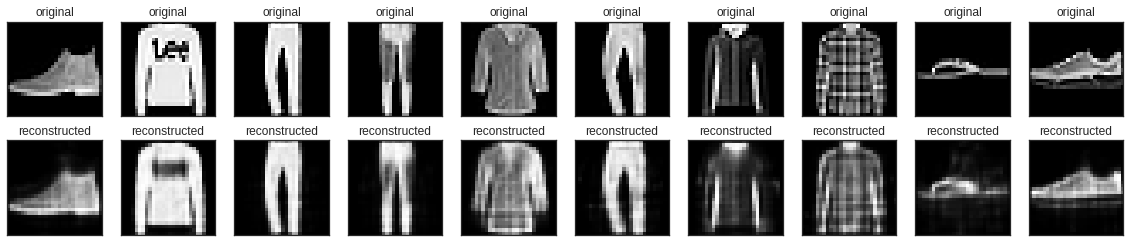

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### # 이미지 노이즈 제거
---

#### # Fashon MNIST 데이터 전처리
---
- 코드 참조 : https://www.tensorflow.org/tutorials/generative/autoencoder?hl=o


In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# tf.newaxis로 차원 수 늘리기
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
# 이미지에 임의의 노이즈 추가

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

# 텐서가 주어지면 값이 clip_value_min 및 clip_value_max로 클리핑 된 텐서와 동일한 유형 및 모양의 텐서를 반환
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

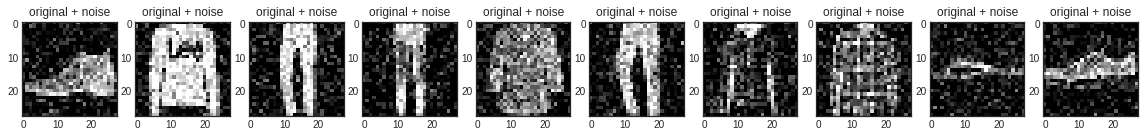

In [ ]:
# 노이즈가 있는 이미지를 시각화

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

#### # 컨볼루셔널 오토인코더 구성
---
- encoder에 Conv2D 레이어를 사용하고 decoder에 Conv2DTranspose 레이어를 사용하여 컨볼루셔널 autoencoder를 훈련한다.

In [ ]:
# 네트워크 구성

class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([Input(shape = (28, 28, 1)),
                                            Conv2D(16, (3, 3), activation = 'relu', padding = 'same', strides = 2),
                                            Conv2D(8, (3, 3), activation = 'relu', padding = 'same', strides = 2)])
        
        self.decoder = tf.keras.Sequential([Conv2DTranspose(8, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),
                                            Conv2DTranspose(16, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),
                                            Conv2D(1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same')])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()

In [ ]:
# 모델 컴파일 및 훈련

autoencoder.compile(optimizer = 'adam',
                    loss = MeanSquaredError())

autoencoder.fit(x_train_noisy, x_train,
                epochs = 10,
                shuffle = True,
                validation_data = (x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.0183 - val_loss: 0.0106
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - val_loss: 0.0083
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [ ]:
# 네트워크 요약

print('<encoder>')
autoencoder.encoder.summary()

print('\n\n\n')
print('<decoder?')
autoencoder.decoder.summary()

<encoder>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________




<decoder?
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspos

#### # 오토인코더에서 생성된 이미지 시각화
---

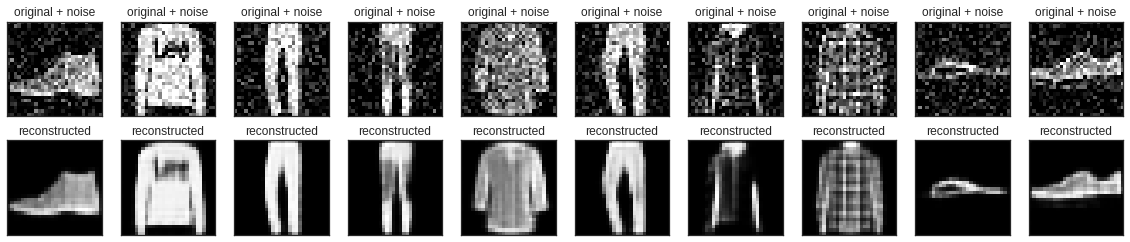

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy() # 노이즈가 있는 이미지
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy() # 노이즈가 제거 된 이미지

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### # 이상 감지
---
이 예에서는 [ECG5000 데이터세트](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000)에서 이상을 감지하도록 autoencoder를 훈련합니다. 이 데이터세트에는 각각 140개의 데이터 포인트가 있는 5,000개의 [심전도](https://en.wikipedia.org/wiki/Electrocardiography)가 포함되어 있습니다. 단순화 된 버전의 데이터세트를 사용하고, 각 예제는 `0`(비정상 리듬에 해당) 또는 `1`(정상 리듬에 해당)으로 레이블이 지정됩니다. 여러분은 비정상 리듬을 식별하는 데 관심이 있습니다.

참고 : 레이블이 지정된 데이터세트를 사용하므로 지도 학습 문제라고 표현할 수 있습니다. 이 예의 목표는 사용 가능한 레이블이 없는 더 큰 데이터세트에 적용할 수 있는 이상 감지 개념을 설명하는 것입니다(예: 정상 리듬이 수천 개이고 비정상 리듬이 적은 경우).

autoencoder를 사용하여 이상을 어떻게 감지하겠습니까? autoencoder는 재구성 오류를 최소화하도록 훈련되었습니다. autoencoder는 정상 리듬으로만 훈련한 다음 이 autoencoder를 사용하여 모든 데이터를 재구성합니다. 여기서 가설은 비정상 리듬의 경우에 재구성 오류가 더 클 것이라는 것입니다. 그런 다음 재구성 오류가 고정 임계값을 초과하는 경우, 리듬을 이상으로 분류합니다.


#### # ECG 데이터 전처리
---

In [ ]:
# 데이터 로드

df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header = None)
raw_data = df.values

display(df.head())

# 라벨 개수 확인
df.iloc[:, -1].value_counts()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


1.0    2919
0.0    2079
Name: 140, dtype: int64

In [ ]:
# 데이터 전처리

labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

# 정규화 - 전체 데이터 기준으로 MinMaxScaler(0, 1)
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
# 레이블이 1로 지정된 정상 리듬만 사용하여 오토인코더를 훈련
# 정상 리듬과 비정상 리듬을 분리

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [ ]:
np.array([1, -1, 2, 0]).astype(bool)

array([ True,  True,  True, False])

In [ ]:
normal_train_data

<tf.Tensor: shape=(2359, 140), dtype=float32, numpy=
array([[0.57030463, 0.46561658, 0.29058117, ..., 0.48504233, 0.4233502 ,
        0.47598344],
       [0.48320588, 0.28246963, 0.16471253, ..., 0.567567  , 0.4677294 ,
        0.2692329 ],
       [0.48144642, 0.35151404, 0.25972766, ..., 0.5479421 , 0.5077544 ,
        0.54298663],
       ...,
       [0.41039047, 0.24164985, 0.13120876, ..., 0.5277313 , 0.5654091 ,
        0.5023885 ],
       [0.5397748 , 0.4140786 , 0.28101394, ..., 0.51266515, 0.43706053,
        0.4426865 ],
       [0.29639772, 0.15988176, 0.18883787, ..., 0.53766966, 0.545786  ,
        0.40826708]], dtype=float32)>

In [ ]:
anomalous_train_data

<tf.Tensor: shape=(1639, 140), dtype=float32, numpy=
array([[0.4304001 , 0.35345322, 0.30342638, ..., 0.30506894, 0.262255  ,
        0.2502011 ],
       [0.4494794 , 0.37906834, 0.3202905 , ..., 0.31546655, 0.39611116,
        0.46317974],
       [0.49198422, 0.4355403 , 0.3698029 , ..., 0.5260356 , 0.52524984,
        0.5278486 ],
       ...,
       [0.43457043, 0.362154  , 0.34958026, ..., 0.3179064 , 0.3426891 ,
        0.49215436],
       [0.4814947 , 0.4255184 , 0.38368973, ..., 0.29031053, 0.3311408 ,
        0.4467481 ],
       [0.4276824 , 0.3507402 , 0.31587753, ..., 0.3177887 , 0.33242297,
        0.419218  ]], dtype=float32)>

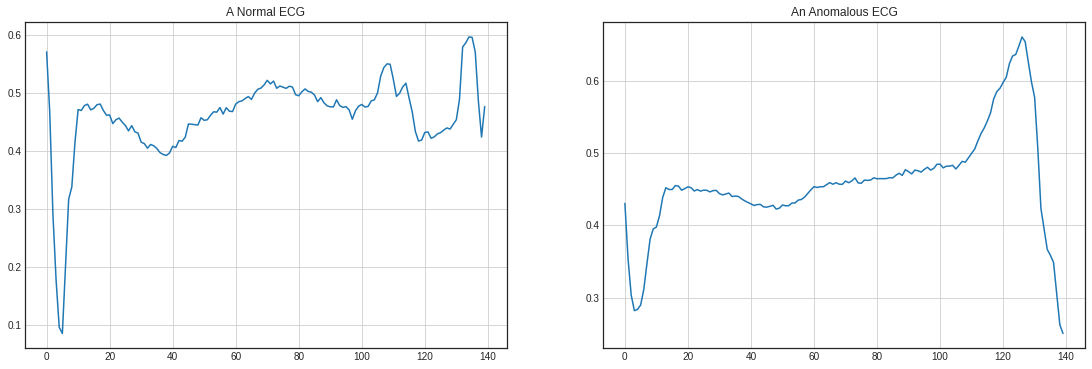

In [ ]:
# 정상, 비정상 ECG 시각화

fig = plt.figure(figsize = (19, 6))
fig.add_subplot(1, 2, 1)
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")

fig.add_subplot(1, 2, 2)
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

#### # 모델 구성
---

In [ ]:
# 모델 학습

class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([Dense(32, activation="relu"),
                                            Dense(16, activation="relu"),
                                            Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([Dense(16, activation="relu"),
                                            Dense(32, activation="relu"),
                                            Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')

history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs = 20, 
          batch_size = 512,
          validation_data = (test_data, test_data),
          shuffle = True)

Epoch 1/20
5/5 [==============================] - 1s 86ms/step - loss: 0.0580 - val_loss: 0.0535
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0565 - val_loss: 0.0521
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0546 - val_loss: 0.0506
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0522 - val_loss: 0.0490
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0491 - val_loss: 0.0476
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0461 - val_loss: 0.0466
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0433 - val_loss: 0.0449
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0404 - val_loss: 0.0431
Epoch 9/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0378 - val_loss: 0.0420
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0353 - val_loss: 0.0412
Epoch 11/20
5/5 [=====================

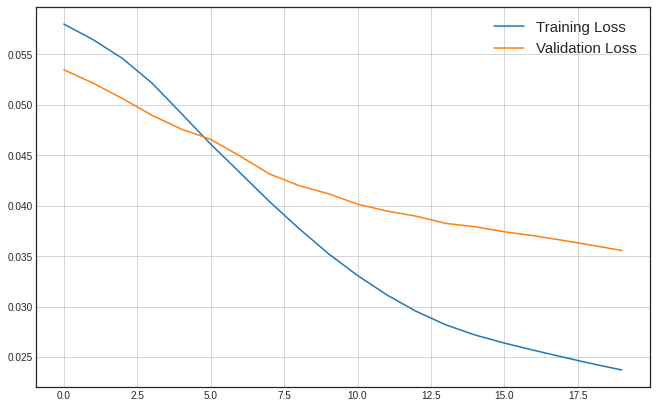

In [ ]:
# 모델 훈련 시각화

plt.figure(figsize = (11, 7))
plt.grid()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend(fontsize = 15)
plt.show()

#### # 인코딩 및 디코딩 된 후의 재구성 오류를 시각화
---
- 재구성 오류가 정상 훈련 예제에서 하나의 표준 편차보다 큰 경우, ECG를 비정상으로 분류합니다.

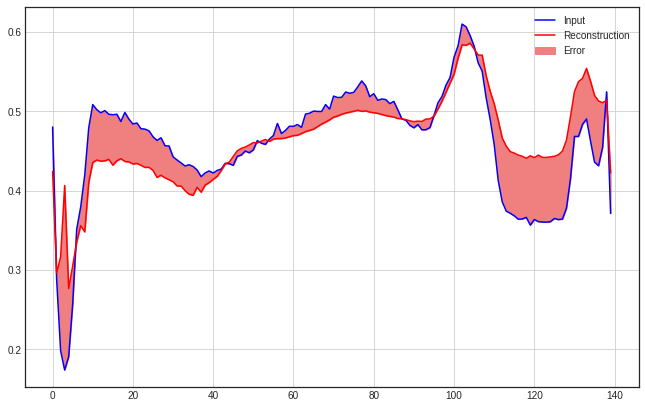

In [ ]:
# 정상 ECG

encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.figure(figsize = (11, 7))
plt.grid()
plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

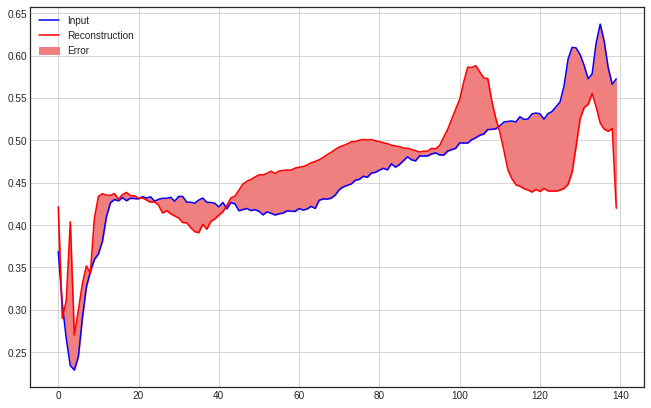

In [ ]:
# 비정상 ECG

encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.figure(figsize = (11, 7))
plt.grid()
plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

#### # 이상 감지하기
---
- 재구성 손실이 고정 임계값보다 큰지 여부를 계산하여 이상을 감지합니다. 이 튜토리얼에서는 훈련 세트에서 정상 예제에 대한 평균 오차를 계산한 다음, 재구성 오류가 훈련 세트의 표준 편차보다 큰 경우 향후 예제를 비정상적인 것으로 분류합니다.
- 테스트 세트에서 비정상적인 예제에 대한 재구성 오류를 조사하면 대부분 임계값보다 더 큰 재구성 오류가 있음을 알 수 있습니다. 임계값을 변경하여 분류자의 정밀도와 재현율을 조정할 수 있습니다.

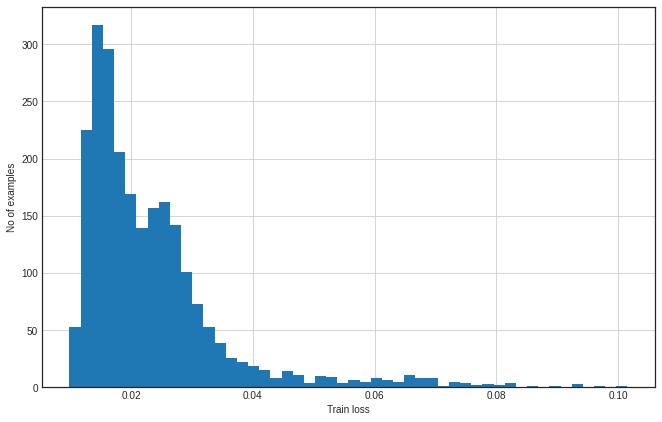

In [ ]:
# 정상 ECG에 대한 재구성 오류를 시각화

reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.figure(figsize = (11, 7))
plt.grid()
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
# 평균보다 표준 편차가 높은 임계값을 선택

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.035480063


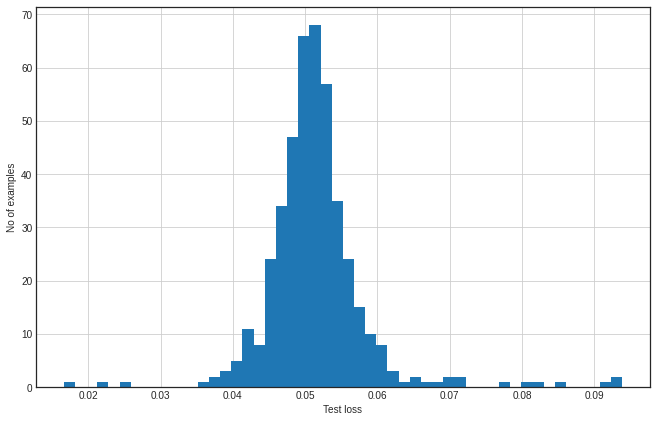

In [ ]:
# 비정상 ECG에 대한 재구성 오류를 시각화

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.figure(figsize = (11, 7))
plt.grid()
plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
# 재구성 오류가 임계값보다 큰 경우 ECG를 이상으로 분류

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.945
Precision = 0.9922027290448343
Recall = 0.9089285714285714
